# Testing Nsaba Functionality

##### Current Methods
- est_aba_ge()
- ge_ratio()
- est_ns_act()
- make_ge_ns_mat()

In [1]:
from nsaba.nsaba import Nsaba
from nsaba.nsaba.visualizer import NsabaVisualizer
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
%load_ext line_profiler

In [3]:
# Simon Path IO

data_dir = '../../data_dir'
os.chdir(data_dir)
Nsaba.aba_load()
Nsaba.ns_load()

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.



In [4]:
# Loading gene expression for all ABA registered Entrez IDs.
A = Nsaba()
A.load_ge_pickle('Nsaba_ABA_ge.pkl')

This may take a minute or two ...
'ge' dictionary successfully loaded


In [12]:
entrids = [1813,1816]
A.est_aba_ge(entrids)

In [10]:
%time A.est_ns_act('attention')
A.est_ns_act('reward')

CPU times: user 1.83 s, sys: 176 ms, total: 2.01 s
Wall time: 2.02 s


In [13]:
A.ge_ratio(entrids);

### Coordinates to gene expression:

Provide a list of coordinates and entrez_ids and the function will return matrix of coordinates by gene expression

In [ ]:
rand = lambda null: np.random.uniform(-10,10,3).tolist()
coord_num = 20
coords = [rand(0) for i in range(coord_num)]

#A.coords_to_ge(coords, entrez_ids=[1813,1816], search_radii=8)

In [ ]:
A.est_aba_ge([733,33,88])

## Visualization Methods (testing)

In [6]:
NV = NsabaVisualizer(A)

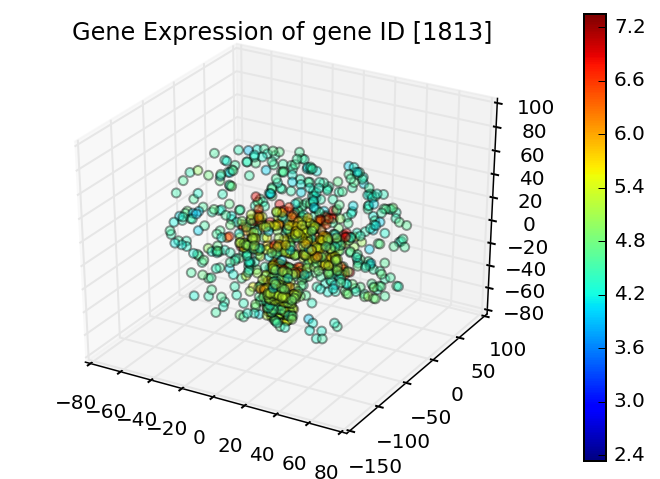

In [7]:
NV.visualize_ge([1813])

In [ ]:
NV.visualize_ns('attention', alpha=.3)

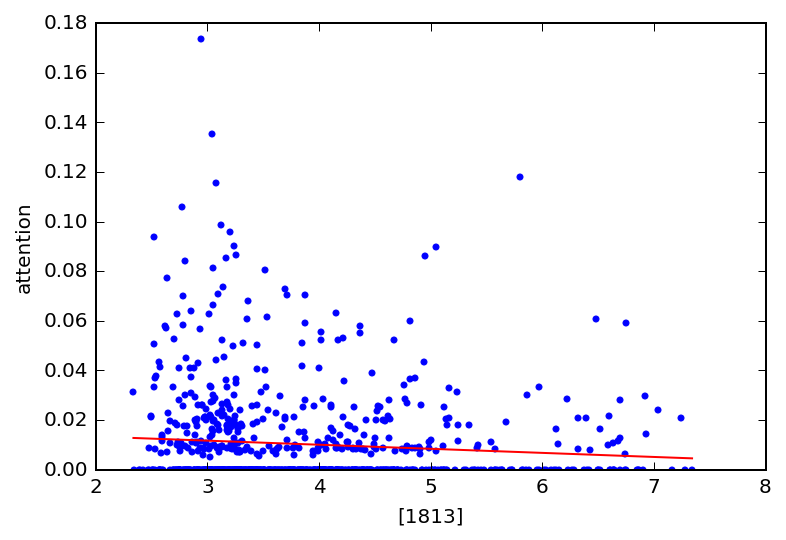

In [14]:
NV.lstsq_ns_ge('attention', [1813]);

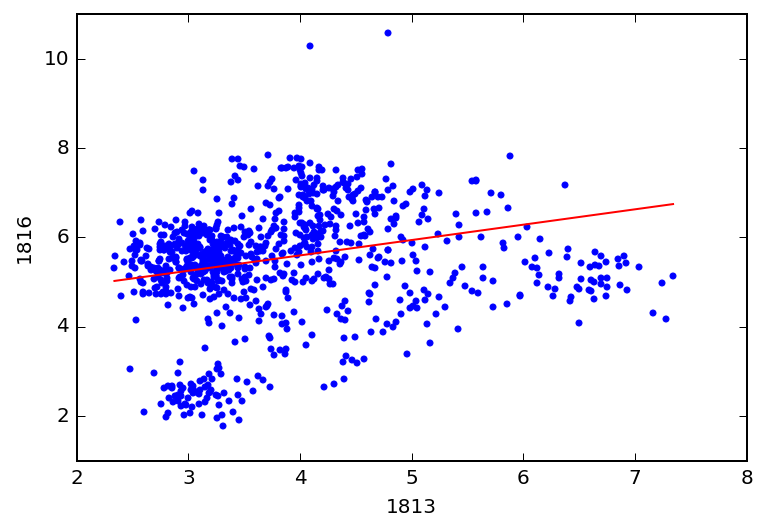

In [15]:
NV.lstsq_ge_ge(1813, 1816);

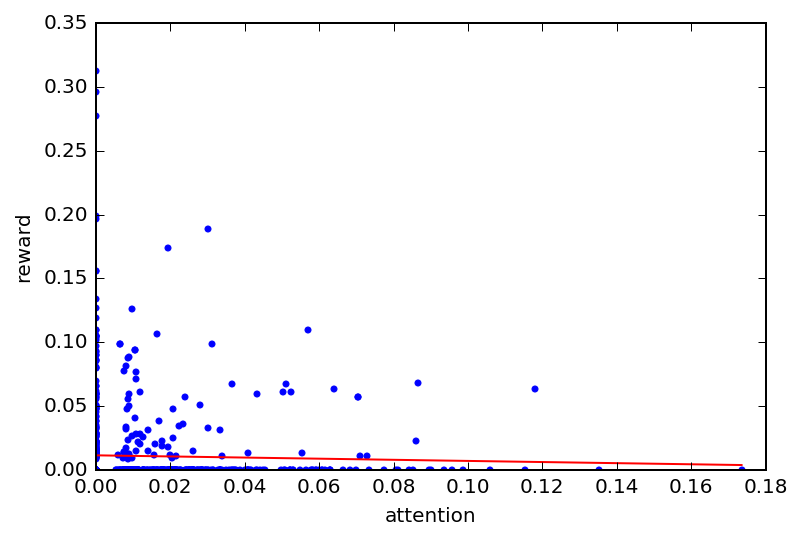

In [16]:
NV.lstsq_ns_ns('attention', 'reward');

In [17]:
A.make_ge_ns_mat('reward', [1813,1816,733]);